In [1065]:
import os
import opendatasets as od
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Data Extraction

In [1066]:
data = 'https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data'
od.download(data)
file_paths = os.listdir('./competitive-data-science-predict-future-sales')
df_s = list(map(lambda path: pd.read_csv(f'./competitive-data-science-predict-future-sales/{path}'), file_paths))

Skipping, found downloaded files in ".\competitive-data-science-predict-future-sales" (use force=True to force download)


In [1067]:
for df in df_s:
    print(df.head())

                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00

Name-correction in df with shop_name

In [1068]:
pattern1 = "^!"
pattern2 = ""
for name in df_s[4]['shop_name'].unique():
    df_s[4].replace({'shop_name': {name: re.sub(pattern1, pattern2, name)}}, inplace = True)

In [1069]:
df_s[4]['shop_name'].unique()

array(['Якутск Орджоникидзе, 56 фран', 'Якутск ТЦ "Центральный" фран',
       'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"',
       'Волжский ТЦ "Волга Молл"', 'Вологда ТРЦ "Мармелад"',
       'Воронеж (Плехановская, 13)', 'Воронеж ТРЦ "Максимир"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Выездная Торговля',
       'Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²',
       'Интернет-магазин ЧС', 'Казань ТЦ "Бехетле"',
       'Казань ТЦ "ПаркХаус" II', 'Калуга ТРЦ "XXI век"',
       'Коломна ТЦ "Рио"', 'Красноярск ТЦ "Взлетка Плаза"',
       'Красноярск ТЦ "Июнь"', 'Курск ТЦ "Пушкинский"',
       'Москва "Распродажа"', 'Москва МТРЦ "Афи Молл"',
       'Москва Магазин С21', 'Москва ТК "Буденовский" (пав.А2)',
       'Москва ТК "Буденовский" (пав.К7)', 'Москва ТРК "Атриум"',
       'Москва ТЦ "Ареал" (Беляево)', 'Москва ТЦ "МЕГА Белая Дача II"',
       'Москва ТЦ "МЕГА Теплый Стан" II',
       'Москва ТЦ "Новый век" (Новокосино)', 'Москва ТЦ "Перловский"',
       'Москва ТЦ 

Item_name correction

In [1070]:
df_s[0]['item_name'].unique()

array(['! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
       '!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]',
       '***В ЛУЧАХ СЛАВЫ   (UNV)                    D', ...,
       'Язык запросов 1С:Предприятия 8 (+CD). Хрусталева Е.Ю.',
       'Яйцо для Little Inu', 'Яйцо дракона (Игра престолов)'],
      dtype=object)

In [1071]:
pattern1 = "[a-zA-ZА-Яа-я0-9].+(?=\s{2})"
pattern2 = "[a-zA-ZА-Яа-я0-9].+"
for name in df_s[0]['item_name'].unique():
    match1 = re.findall(pattern1, name)
    match2 = re.findall(pattern2, name)
    if len(match1) > 0:
        df_s[0].replace({'item_name': {name: match1[0].rstrip()}}, inplace = True)
    else:
        df_s[0].replace({'item_name': {name: match2[0]}}, inplace = True)

In [1072]:
df_s[0]['item_name'].unique()

array(['ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)',
       'ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]',
       'В ЛУЧАХ СЛАВЫ   (UNV)', ...,
       'Язык запросов 1С:Предприятия 8 (+CD). Хрусталева Е.Ю.',
       'Яйцо для Little Inu', 'Яйцо дракона (Игра престолов)'],
      dtype=object)

In [1073]:
df_s[1]['item_category_name'].unique()

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

In [1087]:
df_items = df_s[0]
df_item_categories = df_s[1]
df_sales_train = df_s[2]
df_sample_submission = df_s[3]
df_shops = df_s[4]
df_test = df_s[5]

Itegrity of data

In [1088]:
df_item_month = df_sales_train.groupby(["date_block_num", "shop_id", "item_id"]).agg({'item_cnt_day':'sum', 'item_price':'mean'})
df_train = df_item_month.rename({"item_cnt_day":"item_cnt_month"}, axis=1)
df_train = df_train.reset_index()
merge_params = [[df_items, 'item_id'], [df_item_categories, 'item_category_id'], [df_shops, 'shop_id']]
for params in merge_params:
    df_train = pd.merge(df_train, params[0], on = params[1], how = 'left')
    df_test = pd.merge(df_test, params[0], on = params[1], how = 'left')
df_test = df_test.merge(pd.DataFrame(df_train.groupby("item_category_id").agg({'item_price':'mean'})), on = 'item_category_id')
df_test.head()

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name,item_price
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",1423.005469
1,1,5,5320,ONE DIRECTION,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",281.804765
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",1423.005469
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад""",1453.872413
4,4,5,5268,"Need for Speed [PS4, русская версия]",20,Игры - PS4,"Вологда ТРЦ ""Мармелад""",2708.510376


In [1089]:
df_train.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_name,item_category_id,item_category_name,shop_name
0,0,0,32,6.0,221.0,1+1,40,Кино - DVD,"Якутск Орджоникидзе, 56 фран"
1,0,0,33,3.0,347.0,1+1 (BD),37,Кино - Blu-Ray,"Якутск Орджоникидзе, 56 фран"
2,0,0,35,1.0,247.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"Якутск Орджоникидзе, 56 фран"
3,0,0,43,1.0,221.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"Якутск Орджоникидзе, 56 фран"
4,0,0,51,2.0,128.5,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"Якутск Орджоникидзе, 56 фран"


Check similar named shops

In [1090]:
for name in df_train['shop_name'].unique():
    if df_train[df_train['shop_name'] == name].reset_index(drop = True)['date_block_num'].nunique() != 34:
        print(name)

Якутск Орджоникидзе, 56 фран
Якутск ТЦ "Центральный" фран
Воронеж ТРЦ Сити-Парк "Град"
Жуковский ул. Чкалова 39м?
Казань ТЦ "Бехетле"
Москва ТК "Буденовский" (пав.А2)
Москва ТЦ "МЕГА Белая Дача II"
Москва ТЦ "Новый век" (Новокосино)
Москва ТЦ "Перловский"
Москва ТЦ "Серебряный Дом"
СПб ТК "Сенная"
Тюмень ТЦ "Зеленый Берег"
Химки ТЦ "Мега"
Вологда ТРЦ "Мармелад"
Якутск Орджоникидзе, 56
Якутск ТЦ "Центральный"
Цифровой склад 1С-Онлайн
Красноярск ТЦ "Взлетка Плаза"
Выездная Торговля
Тюмень ТРЦ "Кристалл"
РостовНаДону ТРК "Мегацентр Горизонт"
РостовНаДону ТРК "Мегацентр Горизонт" Островной
Томск ТРЦ "Изумрудный Город"
Н.Новгород ТРЦ "РИО"
Мытищи ТРК "XL-3"
Москва "Распродажа"
Жуковский ул. Чкалова 39м²
Новосибирск ТРЦ "Галерея Новосибирск"


In [1082]:
def shop_name_check(shop_name_1, shop_name_2):

    c1 = df_train[df_train['shop_name'] == shop_name_1].reset_index(drop = True)
    c1 = pd.DataFrame(c1.groupby('date_block_num').agg({'item_cnt_month': 'mean'}))
    c2 = df_train[df_train['shop_name'] == shop_name_2].reset_index(drop = True)
    c2 = pd.DataFrame(c2.groupby('date_block_num').agg({'item_cnt_month': 'mean'}))
    
    plt.figure(figsize = (10,6))

    plt.bar(c1.index, c1['item_cnt_month'], color = 'g', label = shop_name_1, alpha = 0.8)
    plt.bar(c2.index, c2['item_cnt_month'], color = 'b', label = shop_name_2, alpha = 0.7)

    plt.xticks(range(0,34));
    plt.legend()
    plt.xlabel('Date_block_num')
    plt.ylabel('item_cnt_month')
    plt.title('Shops comparison')

    plt.show()

pair 1.Якутск Орджоникидзе, 56 фран and Якутск Орджоникидзе, 56

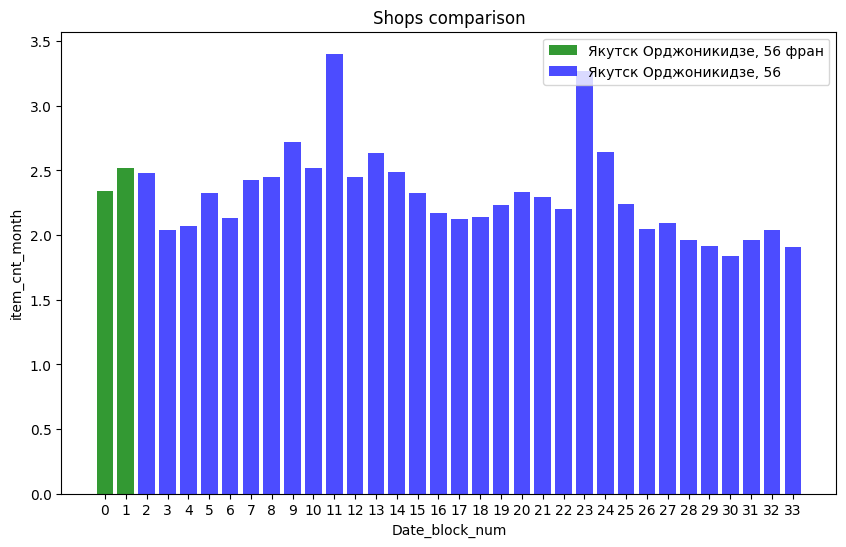

In [1091]:
shop_name_check('Якутск Орджоникидзе, 56 фран', 'Якутск Орджоникидзе, 56')

Combining them - we'll get full range of data

In [1092]:
def shop_corr(shop_name_1, shop_name_2):
    shop_id_1 = df_shops[df_shops['shop_name'] == shop_name_1]['shop_id'].unique()[0]
    shop_id_2 = df_shops[df_shops['shop_name'] == shop_name_2]['shop_id'].unique()[0]
    df_train.replace({'shop_id': {shop_id_2: shop_id_1}, 'shop_name': {shop_name_2: shop_name_1}}, inplace = True)
    if list(df_test[df_test['shop_id'] == shop_id_2]) != 0:
        df_test.replace({'shop_id': {shop_id_2: shop_id_1}}, inplace = True)
    

In [1093]:
shop_corr('Якутск Орджоникидзе, 56 фран', 'Якутск Орджоникидзе, 56')

Якутск ТЦ "Центральный" фран, Якутск ТЦ "Центральный"

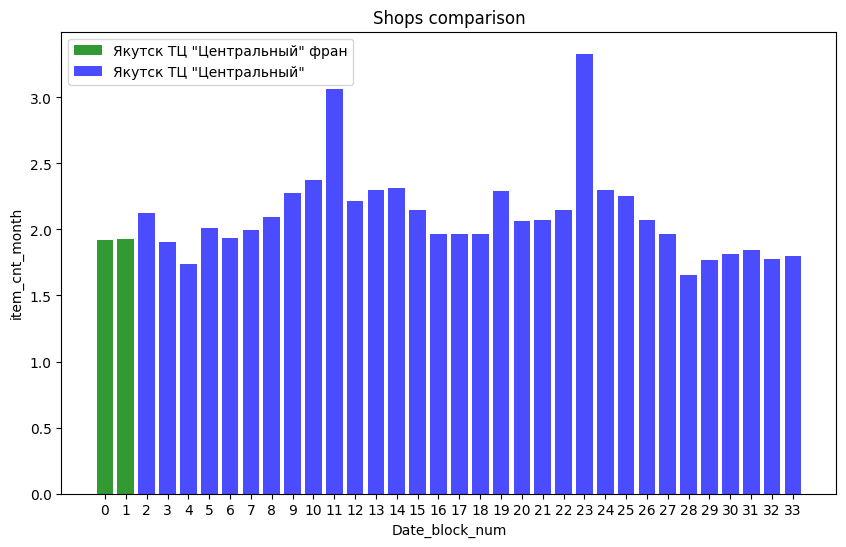

In [1094]:
shop_name_check('Якутск ТЦ "Центральный" фран', 'Якутск ТЦ "Центральный"')

In [1095]:
shop_corr('Якутск ТЦ "Центральный" фран', 'Якутск ТЦ "Центральный"')

Жуковский ул. Чкалова 39м?, Жуковский ул. Чкалова 39м²

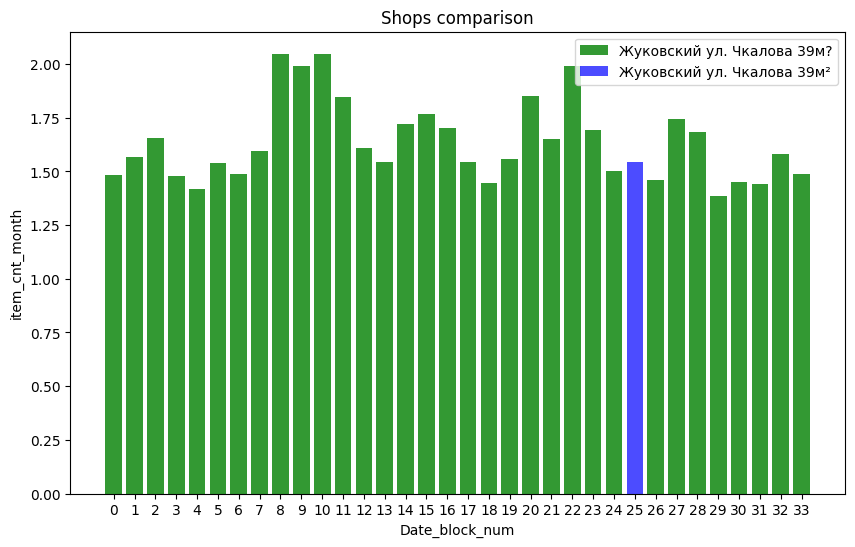

In [1096]:
shop_name_check('Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²')

In [1097]:
shop_corr('Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²')

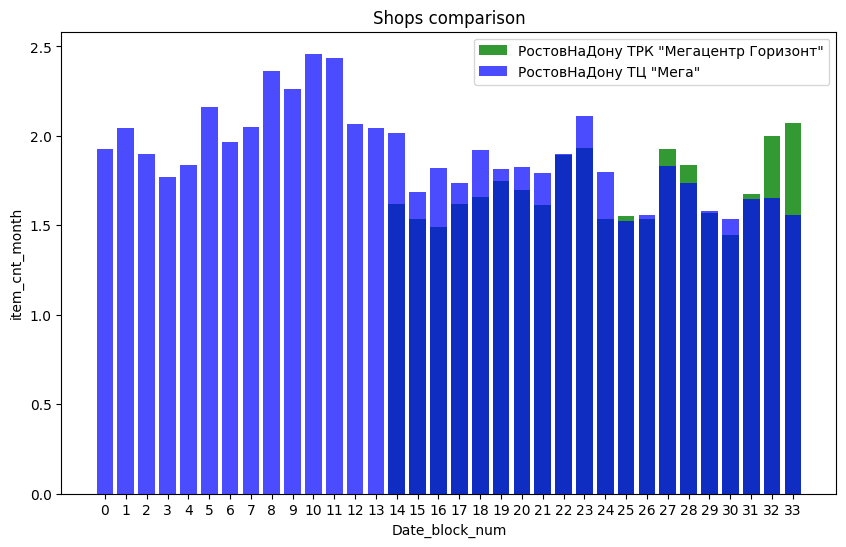

In [1098]:
shop_name_1 = 'РостовНаДону ТРК "Мегацентр Горизонт"'
shop_name_2 = 'РостовНаДону ТЦ "Мега"'
shop_name_check(shop_name_1, shop_name_2)


In [1099]:
shop_corr(shop_name_1, shop_name_2)


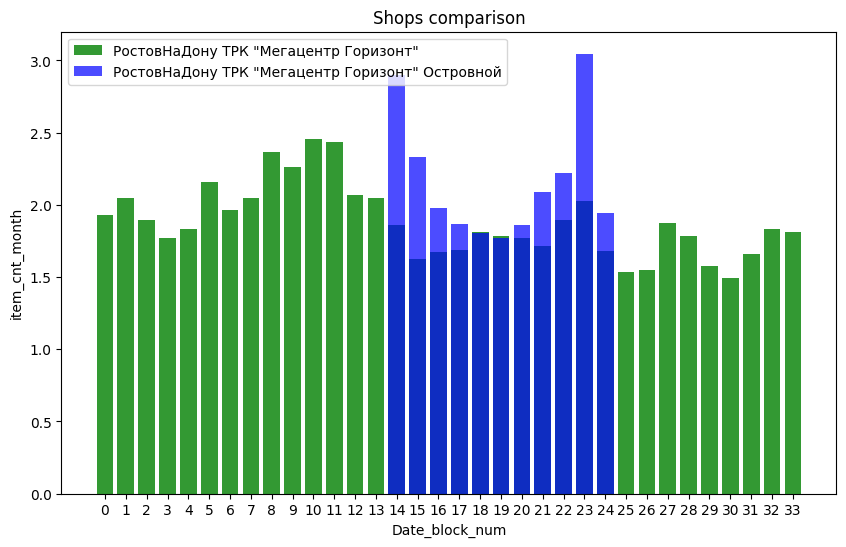

In [1100]:
shop_name_1 = 'РостовНаДону ТРК "Мегацентр Горизонт"'
shop_name_2 = 'РостовНаДону ТРК "Мегацентр Горизонт" Островной'
shop_name_check(shop_name_1, shop_name_2)


In [1101]:
shop_corr(shop_name_1, shop_name_2)

Completeness and Uniqueness check

In [90]:
for i in range(len(df_s)):
    if df_s[i].isna().values.any():
        print(df_s[i].loc[df_s[i].isna().any(axis=1)])
        print(f'Percentage of missing values: {(df_sales_train.isna().any().sum()/len(df_s[i])):.4%}')
    if df_s[i].duplicated(keep = False).values.any():
        print(df_s[i][df_s[i].duplicated()])
        print(f'\nPercentage of duplicates in df_s[{i}]: {(df_s[i].duplicated().sum()/len(df_s[i])):.4%}')

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
76962   2013-01-05               0       54    20130       149.0           1.0
1435367 2014-02-23              13       50     3423       999.0           1.0
1496766 2014-03-23              14       21     3423       999.0           1.0
1671873 2014-05-01              16       50     3423       999.0           1.0
1866340 2014-07-12              18       25     3423       999.0           1.0
2198566 2014-12-31              23       42    21619       499.0           1.0

Percentage of duplicates in df_s[2]: 0.0002%


As duplicates include the column item_cnt_day (date-specific value), it is no sense to fill duplicates with some other value
Also, as percentage of duplicates too small (0.0002%) - we can painlessly delete them

In [91]:
df_s[2].drop_duplicates(inplace=True)

ETL - load

In [109]:
df_train.to_csv('train.csv')
df_test.to_csv('test.csv')

In [114]:
sales_per_month = df_sales_train.groupby(['date_block_num', 'shop_id', 'item_id'])[['date','item_price', 'item_cnt_day']].agg({'date': 'mean','item_price': 'mean', 'item_cnt_day': 'sum'})
sales_per_month.head()

date  item_price  item_cnt_day
date_block_num shop_id item_id                                     
0              0       32      2013-01-20       221.0           6.0
                       715     2013-01-19        91.0           3.0
                       810     2013-01-16       120.0           4.0
                       997     2013-01-08        58.0           1.0
                       1091    2013-01-28       110.0           1.0

In [127]:
1group1 = df_sales_train.groupby('item_category_id').agg({'item_cnt_day': 'sum'})
group1.min, group1.max
fig = px.bar(group1, x = group1.index, y = 'item_cnt_day', width=800, height=800).update_layout(
    xaxis_title="Category", yaxis_title= "Total sales per category"
)

fig.update_xaxes(showticklabels=False)
fig.show()

In [116]:
cat_40 = df_sales_train[df_sales_train['item_category_name'] == 'Кино - DVD'].groupby('date_block_num')[['date', 'item_cnt_day']].agg({'date': 'min', 'item_cnt_day': 'sum'}).set_index('date')
cat_40.head()

,item_cnt_day
date,
2013-01-01,28349.0
2013-02-01,27210.0
2013-03-01,34082.0
2013-04-01,25690.0
2013-05-01,23714.0


<Axes: xlabel='date'>

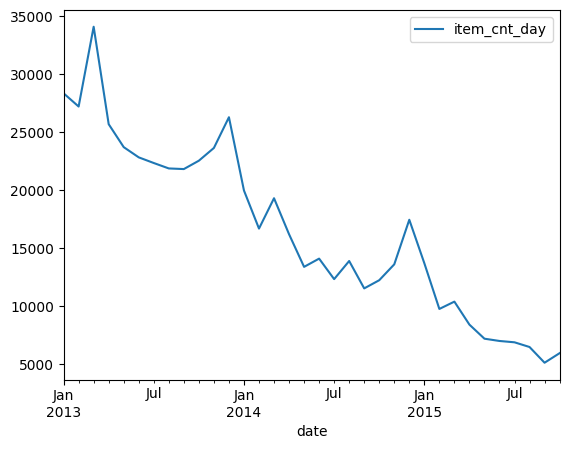

In [117]:
cat_40.plot()

In [126]:
group2 = df_sales_train.groupby('shop_name').agg({'item_cnt_day': 'sum'})
fig = px.bar(group2, x = group2.index, y = 'item_cnt_day', width=800, height=800).update_layout(
    xaxis_title="shop", yaxis_title= "Total sales per shop"
)

fig.update_xaxes(showticklabels=False)
fig.show()

In [119]:
df_shops[df_shops['shop_name'] == 'Москва ТЦ "Семеновский"']

,shop_name,shop_id
31,"Москва ТЦ ""Семеновский""",31


In [120]:
shop31 = df_sales_train[df_sales_train['shop_id'] == 31].groupby('date_block_num')[['date', 'item_cnt_day']].agg({'date': 'min', 'item_cnt_day': 'sum'}).set_index('date')
shop31.head()

,item_cnt_day
date,
2013-01-02,8826.0
2013-02-01,10019.0
2013-03-01,11513.0
2013-04-01,9056.0
2013-05-01,8788.0


<Axes: xlabel='date'>

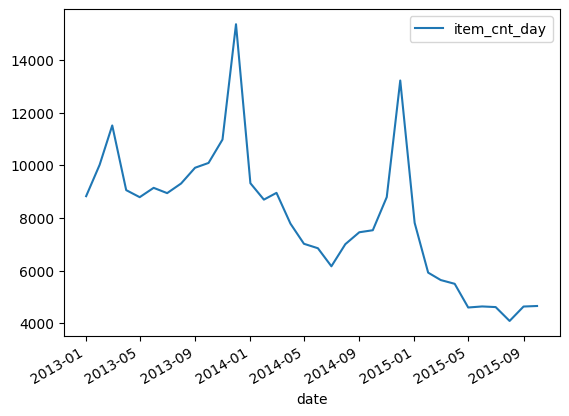

In [121]:
shop31.plot()

In [160]:
sales_per_month.groupby('date_block_num')

date  item_price  item_cnt_day
date_block_num shop_id item_id                                              
0              0       32      2013-01-20 00:00:00       221.0           6.0
                       715     2013-01-19 00:00:00        91.0           3.0
                       810     2013-01-16 00:00:00       120.0           4.0
                       997     2013-01-08 00:00:00        58.0           1.0
                       1091    2013-01-28 00:00:00       110.0           1.0
...                                            ...         ...           ...
33             59      21449   2015-10-30 12:00:00       449.0           2.0
                       21811   2015-10-27 00:00:00       199.0           1.0
                       22088   2015-10-15 00:00:00       119.0           2.0
                       22100   2015-10-18 00:00:00       629.0           1.0
                       22102   2015-10-16 00:00:00      1250.0           1.0

[1364393 rows x 3 columns]